# Sumarização com algoritimo LUHN

O algoritmo de LUHN
- Seleciona palavras de amiro importancia baseado na frequencia
- Pesos maiores são associados á palavras no inicio do documento
- Para calcular a nota de uma sentença: 4 elevado 2/6=2,7

#### Função para calcular a nota das sentenças

In [1]:
from utils_algoritmo_luhn import calcular_nota_sentenca

[nltk_data] Downloading package punkt to /home/derpy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/derpy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Função pra sumarizar os textos

In [2]:
from utils_algoritmo_luhn import preprocessamento
from utils_algoritmo_luhn import sumarizar

In [3]:
texto_original = """A inteligência artificial é a inteligência similar à humana. Definem como
o estudo de agente artificial com inteligência. Ciência e engenharia de
produzir máquinas com inteligência. Resolver problemas e possuir
inteligência. Relacionada ao comportamento inteligente. Construção de
máquinas para raciocinar. Aprender com os erros e acertos. Inteligência
artificial é raciocinar nas situações do cotidiano."""


In [4]:
sentencas_originais, melhores_sentencas, notas_sentencas =  sumarizar(texto_original,5, 3, 3)

In [5]:
sentencas_originais

['A inteligência artificial é a inteligência similar à humana.',
 'Definem como\no estudo de agente artificial com inteligência.',
 'Ciência e engenharia de\nproduzir máquinas com inteligência.',
 'Resolver problemas e possuir\ninteligência.',
 'Relacionada ao comportamento inteligente.',
 'Construção de\nmáquinas para raciocinar.',
 'Aprender com os erros e acertos.',
 'Inteligência\nartificial é raciocinar nas situações do cotidiano.']

In [6]:
melhores_sentencas

['Aprender com os erros e acertos.',
 'Definem como\no estudo de agente artificial com inteligência.',
 'Construção de\nmáquinas para raciocinar.']

In [7]:
notas_sentencas

[(2.0, 0), (2.25, 1), (2.0, 2), (2.0, 3), (2.0, 4), (2.0, 5), (3.0, 6)]

# Visualização do Resumo

In [8]:
from IPython.core.display import HTML
def visualiza_resumo(titulo, lista_sentencas, melhores_sentencas):
    """
        Função para visualizar o texto com html
    """
    texto = ""

    display(HTML("<h1>Resumo do texto</h1>"))

    for sentenca in lista_sentencas:
        if sentenca in melhores_sentencas:
            texto += str(sentenca).replace(
                sentenca, f"<mark>{sentenca}</mark>"
            )
        else:
            texto += sentenca
    display(HTML(f"""{texto}"""))

In [9]:
visualiza_resumo("teste", sentencas_originais, melhores_sentencas)

# Extraindo texto da internet

In [10]:
from goose3 import Goose

In [11]:
g = Goose()
artigo = g.extract(url="https://iaexpert.academy/2021/10/25/ia-atinge-novo-patamar-geracao-imagens-corpo-inteiro-a-partir-uma-unica-foto/")

In [12]:
artigo.cleaned_text

'A geração de imagens humanas fotorrealistas tem aplicações que incluem a criação de avatares virtuais, provadores virtuais, transferência de movimentos e a chamada síntese de posicionamento, onde várias imagens são usadas para gerar uma imagem de um novo ponto de vista. No caso de pessoas, esta tarefa é particularmente complicada para as abordagens tradicionais de processamento gráfico porque ela envolve a geometria tridimensional do corpo e das roupas; o controle das poses que é limitado pela estrutura física dos corpos e que causa deformações na forma; e a síntese de padrões de dobra que ocorrem, por exemplo, com roupas largas. Recentemente, métodos baseados em inteligência artificial mostraram resultados promissores utilizando redes generativas adversariais, mas para aplicações muito particulares, não atingindo o grau de generalização necessário para seu uso indiscriminado.\n\nPartindo destes métodos, pesquisadores da Virginia Tech, nos Estados Unidos, em parceria com a Adobe, apre

In [13]:
sentencas_originais, melhores_sentencas, notas_sentencas =  sumarizar(artigo.cleaned_text,10, 10, 3)

In [14]:
sentencas_originais

['A geração de imagens humanas fotorrealistas tem aplicações que incluem a criação de avatares virtuais, provadores virtuais, transferência de movimentos e a chamada síntese de posicionamento, onde várias imagens são usadas para gerar uma imagem de um novo ponto de vista.',
 'No caso de pessoas, esta tarefa é particularmente complicada para as abordagens tradicionais de processamento gráfico porque ela envolve a geometria tridimensional do corpo e das roupas; o controle das poses que é limitado pela estrutura física dos corpos e que causa deformações na forma; e a síntese de padrões de dobra que ocorrem, por exemplo, com roupas largas.',
 'Recentemente, métodos baseados em inteligência artificial mostraram resultados promissores utilizando redes generativas adversariais, mas para aplicações muito particulares, não atingindo o grau de generalização necessário para seu uso indiscriminado.',
 'Partindo destes métodos, pesquisadores da Virginia Tech, nos Estados Unidos, em parceria com a A

In [15]:
melhores_sentencas

['Recentemente, métodos baseados em inteligência artificial mostraram resultados promissores utilizando redes generativas adversariais, mas para aplicações muito particulares, não atingindo o grau de generalização necessário para seu uso indiscriminado.',
 'Os detalhes da imagem original são mantidos modulando a rede geradora através técnicas computacionais baseadas em superfície, que garantem a correta transferência da informação de um pixel dadas as restrições impostas pela nova posição.',
 'O modelo usa a rede generativa chamada de StyleGAN, para transferência de estilo, mas numa abordagem condicionada pela pose.']

In [16]:
notas_sentencas

[(2.0, 0),
 (3.0, 1),
 (4.0, 2),
 (3.125, 3),
 (3.272727272727273, 4),
 (3.272727272727273, 5),
 (2.0, 6),
 (1.0, 7),
 (1.6, 8),
 (2.0, 9),
 (2.0, 10),
 (2.0, 11),
 (0.6666666666666666, 12),
 (2.0, 13),
 (3.0, 14)]

In [17]:
visualiza_resumo("teste", sentencas_originais, melhores_sentencas)

# Leitura de artigos de feed de noticias(RSS)

In [18]:
# instalando feedparser
!pip install feedparser

You should consider upgrading via the '/home/derpy/.cache/pypoetry/virtualenvs/classificacao-de-dados-pln-ri4D_3JE-py3.8/bin/python -m pip install --upgrade pip' command.


In [19]:
import feedparser
import os
import json
from bs4 import BeautifulSoup


In [20]:
url = "https://iaexpert.academy/feed/"
feed = feedparser.parse(url)

In [21]:
feed.entries

[{'title': 'IA revela fatores que levam a baixo índice de notificação de erros médicos',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://iaexpert.academy/feed/',
   'value': 'IA revela fatores que levam a baixo índice de notificação de erros médicos'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://iaexpert.academy/2022/01/24/ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos/?utm_source=rss&utm_medium=rss&utm_campaign=ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos'}],
  'link': 'https://iaexpert.academy/2022/01/24/ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos/?utm_source=rss&utm_medium=rss&utm_campaign=ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos',
  'comments': 'https://iaexpert.academy/2022/01/24/ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos/#respond',
  'authors': [{'name': 'Denn

In [22]:
for e in feed.entries:
    print(e.title)
    print(e.links[0].href)

IA revela fatores que levam a baixo índice de notificação de erros médicos
https://iaexpert.academy/2022/01/24/ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos/?utm_source=rss&utm_medium=rss&utm_campaign=ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos
IA auxilia a produzir melhores diagnósticos de fratura óssea
https://iaexpert.academy/2022/01/21/ia-auxilia-a-produzir-melhores-diagnosticos-de-fratura-ossea/?utm_source=rss&utm_medium=rss&utm_campaign=ia-auxilia-a-produzir-melhores-diagnosticos-de-fratura-ossea
Primeiro programa em Python
https://iaexpert.academy/2022/01/20/primeiro-programa-em-python/?utm_source=rss&utm_medium=rss&utm_campaign=primeiro-programa-em-python
IA aumenta a resolução e a sensibilidade de microscópios eletrônicos
https://iaexpert.academy/2022/01/19/ia-aumenta-resolucao-sensibilidade-microscopios-eletronicos/?utm_source=rss&utm_medium=rss&utm_campaign=ia-aumenta-resolucao-sensibilidade-microscopios-eletronicos

In [23]:
for e in feed.entries:
    print(e.title)
    print(e.links[0].href)
    print(e.content[0].value)

IA revela fatores que levam a baixo índice de notificação de erros médicos
https://iaexpert.academy/2022/01/24/ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos/?utm_source=rss&utm_medium=rss&utm_campaign=ia-revela-fatores-que-levam-a-baixo-indice-de-notificacao-de-erros-medicos
<p>Os erros médicos são uma das principais causas de morte em ambiente hospitalar. Nos Estados Unidos, as mortes causadas por erro médico superam aquelas causadas por câncer de mama, AIDS e acidentes de carro juntos. O erro médico mais comum é aquele de medicação, sendo os enfermeiros os principais responsáveis por administrar remédios. Enquanto que os erros de medicação que causam prejuízo aos pacientes são geralmente reportados, há um forte incentivo para não reportar os erros &#8220;benignos&#8221;, sendo as principais razões o medo de atribuição de culpa, de punição e de retaliações. Com isto, as causas dos erros acabam não sendo investigadas adequadamente, e eles continuam acontece

In [24]:
e.content[0]

{'type': 'text/html',
 'language': None,
 'base': 'https://iaexpert.academy/feed/',
 'value': '<p>Saiba mais sobre a Trilha de Aprendizagem Processamento de Linguagem Natural.  </p>\n\n\n\n<p>Esta trilha visa fornecer ao aluno os subsídios necessários para desenvolver aplicações reais e trabalhar na área de Processamento de Linguagem Natural. Ao final, o aluno será capaz de desenvolver seus próprios projetos utilizando textos em vários idiomas.</p>\n\n\n\n<p>Todos os cursos da trilha estão disponíveis para <a href="https://iaexpert.academy/assinatura" rel="noreferrer noopener" target="_blank">assinantes</a> IA Expert Academy.</p>\n\n\n\n<figure class="wp-block-embed"><div class="wp-block-embed__wrapper">\n<div class="ast-oembed-container"></div>\n</div></figure>'}

In [25]:
def limpar_html(texto):
    if texto == "":
        return ""
    return BeautifulSoup(texto, "html5lib").get_text()

In [26]:
limpar_html(e.content[0].value)

'Saiba mais sobre a Trilha de Aprendizagem Processamento de Linguagem Natural.  \n\n\n\nEsta trilha visa fornecer ao aluno os subsídios necessários para desenvolver aplicações reais e trabalhar na área de Processamento de Linguagem Natural. Ao final, o aluno será capaz de desenvolver seus próprios projetos utilizando textos em vários idiomas.\n\n\n\nTodos os cursos da trilha estão disponíveis para assinantes IA Expert Academy.\n\n\n\n\n\n'

In [27]:
artigos = []
for e in feed.entries:
    artigos.append({"titulo": e.title, "conteudo": limpar_html(e.content[0].value)})

In [28]:
artigos

[{'titulo': 'IA revela fatores que levam a baixo índice de notificação de erros médicos',
  'conteudo': 'Os erros médicos são uma das principais causas de morte em ambiente hospitalar. Nos Estados Unidos, as mortes causadas por erro médico superam aquelas causadas por câncer de mama, AIDS e acidentes de carro juntos. O erro médico mais comum é aquele de medicação, sendo os enfermeiros os principais responsáveis por administrar remédios. Enquanto que os erros de medicação que causam prejuízo aos pacientes são geralmente reportados, há um forte incentivo para não reportar os erros “benignos”, sendo as principais razões o medo de atribuição de culpa, de punição e de retaliações. Com isto, as causas dos erros acabam não sendo investigadas adequadamente, e eles continuam acontecendo.\n\n\n\nUm trabalho de pesquisadores da Universidade de Iowa, nos Estados Unidos, aplicou inteligência artificial para entender melhor as principais razões pelas quais estes erros benignos não são reportados. El

In [29]:
# salvando artigos em arquivos json
arquivo_gravar = os.path.join("feed_iaexpert.json")
arquivo = open(arquivo_gravar, "w+")
arquivo.write(json.dumps(artigos, indent=1))
arquivo.close()

In [30]:
artigos_blog = json.loads(open("../algoritimo_luhn/feed_iaexpert.json").read())
artigos_blog

[{'titulo': 'IA revela fatores que levam a baixo índice de notificação de erros médicos',
  'conteudo': 'Os erros médicos são uma das principais causas de morte em ambiente hospitalar. Nos Estados Unidos, as mortes causadas por erro médico superam aquelas causadas por câncer de mama, AIDS e acidentes de carro juntos. O erro médico mais comum é aquele de medicação, sendo os enfermeiros os principais responsáveis por administrar remédios. Enquanto que os erros de medicação que causam prejuízo aos pacientes são geralmente reportados, há um forte incentivo para não reportar os erros “benignos”, sendo as principais razões o medo de atribuição de culpa, de punição e de retaliações. Com isto, as causas dos erros acabam não sendo investigadas adequadamente, e eles continuam acontecendo.\n\n\n\nUm trabalho de pesquisadores da Universidade de Iowa, nos Estados Unidos, aplicou inteligência artificial para entender melhor as principais razões pelas quais estes erros benignos não são reportados. El

# Nuvem de palavras

In [31]:
conteudo_feed = ""
for artigo in artigos_blog:
    conteudo_feed += artigo["conteudo"]

In [32]:
# formatando o texto
conteudo_feed_formatado = preprocessamento(conteudo_feed)
conteudo_feed_formatado

'erros médicos principais causas morte ambiente hospitalar estados unidos mortes causadas erro médico superam causadas câncer mama aids acidentes carro juntos erro médico comum medicação sendo enfermeiros principais responsáveis administrar remédios enquanto erros medicação causam prejuízo pacientes geralmente reportados forte incentivo reportar erros “ benignos ” sendo principais razões medo atribuição culpa punição retaliações causas erros acabam sendo investigadas adequadamente continuam acontecendo trabalho pesquisadores universidade iowa estados unidos aplicou inteligência artificial entender melhor principais razões quais erros benignos reportados escolheram algoritmos machine learning habilidade tratar dados inter-relacionados maneira não-linear caso comportamentos humanos envolvidos processo primeiro variáveis maior impacto fenômeno selecionadas método chamado extreme learning machines elms usa modelos predição extremamente rápidos investigar número grande variáveis potenciais 

In [33]:
len(conteudo_feed), len(conteudo_feed_formatado)

(15338, 11568)

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


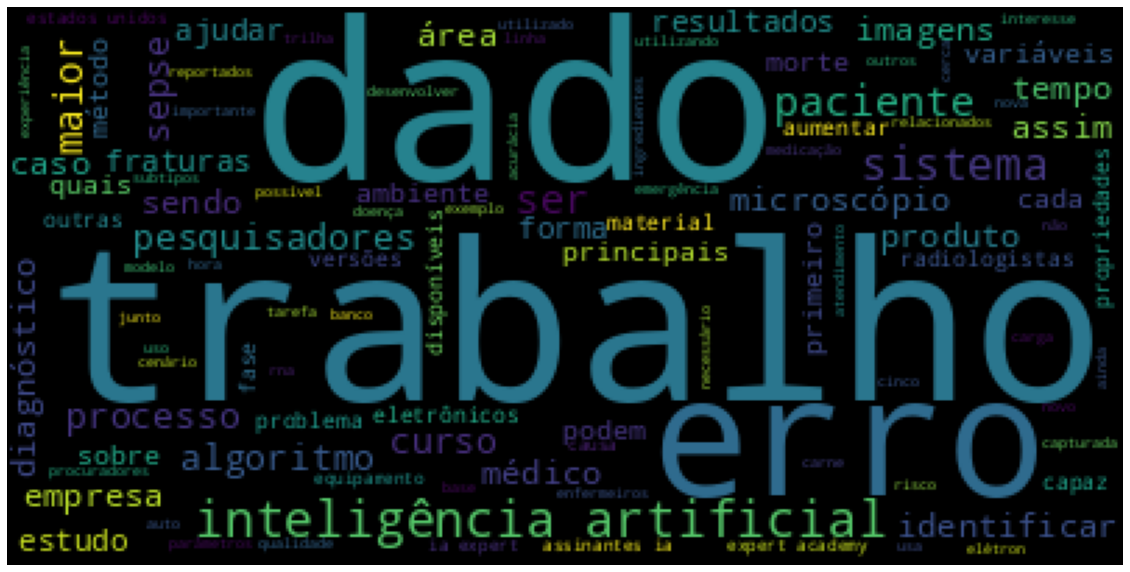

In [35]:
# defininado tamanho da imagem
plt.figure(figsize=(20, 20))

plt.axis("off")
# gerando nuvem de palavras
plt.imshow(WordCloud().generate(conteudo_feed_formatado));

# Extração de entidades nomeadas

In [36]:
import spacy

In [37]:
pln = spacy.load("pt_core_news_sm")

In [38]:
documento = pln(conteudo_feed_formatado)

In [39]:
from spacy import displacy
# visualizando entidades com o displacy
displacy.render(documento, style="ent", jupyter=True)

In [40]:
# filtrando localizações
for entidade in documento.ents:
    if entidade.label_ == "LOC":
        print(entidade.text,"---", entidade.label_)

estados unidos --- LOC
estados unidos --- LOC
estados unidos --- LOC
estados unidos --- LOC
canadá --- LOC
china --- LOC
china --- LOC
alemanha --- LOC
chile --- LOC


# Sumarização de artigos de feed de noticias

In [42]:
# for artigo in artigos_blog:
#     sentencas_originais, melhores_sentencas, _ = sumarizar(artigo["conteudo"], 150, 10, 5)